In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [18]:
encoded_data =pd.read_csv('C:/Users/A4647/OneDrive - Axtria/Desktop/Datadrift/Datadrift_POC_with_health_data/artifact/data/meta_data(data_cleaned).csv',)

In [19]:
encoded_data

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,Age_group,days in Hospital,bill_group
0,0,0,0,0,0,0,0,0,14,0
1,1,1,1,1,1,1,1,1,14,0
2,1,2,2,0,1,1,1,0,30,0
3,1,2,1,0,2,2,2,0,1,1
4,1,0,3,1,2,3,1,0,24,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,4,2,1,0,4,2,0,4,0
9996,0,3,3,4,1,4,1,0,23,2
9997,1,2,3,4,0,4,1,0,14,0
9998,1,4,3,1,2,2,1,0,20,1


In [20]:
x = encoded_data.drop('Test Results',1)
y = encoded_data['Test Results']

In [21]:
num = ['days in Hospital']

In [22]:
ss = StandardScaler()

In [23]:
x[num] = ss.fit_transform(x[num])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [25]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [26]:
lr_model = lr.fit(x_train,y_train)

In [4]:
y_test_pred = lr_model.predict(x_test)
y_train_pred = lr_model.predict(x_train)
y_test_prob_1 = lr_model.predict_proba(x_test)[:,1]

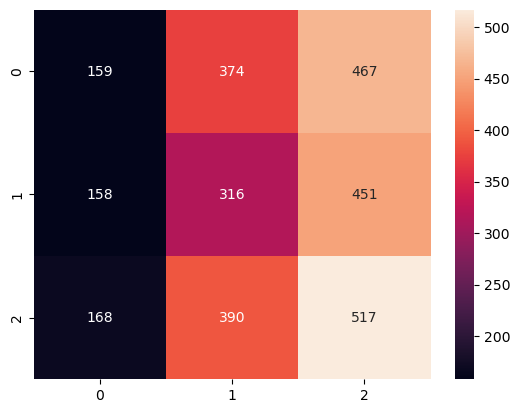

In [5]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [6]:
lr_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",lr_accuracy_score)

Train accuracy =  0.3462857142857143


In [7]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(lr,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.29695006 0.31917941 0.27228086 0.26420505 0.26618229]
Bias error: 0.7162404658499026
Variance error: 0.07478516201206653


In [8]:
#solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#penalty = ['l1', 'l2', 'elasticnet']
#c_values = [1100,1000,150,100, 10, 1.0, 0.1, 0.01,0.001]
#tol = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
#dual = [False, True]
#multi_class = ['auto', 'ovr', 'multinomial']
#warm_start = [False,True]
#n_job = [1,2,3,4,5,10,15,20]
## define grid search
#grid = dict(solver=solvers,penalty=penalty,C=c_values,tol=tol,dual=dual,multi_class=multi_class,warm_start=warm_start,n_jobs=n_job)
##cv = KFold(n_splits=10, n_repeats=3, random_state=1)
#lr = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
#lr.fit(x_train,y_train)

In [9]:
#best = lr.best_params_
#best

In [10]:
best = {'C': 1.0,
 'dual': False,
 'multi_class': 'auto',
 'n_jobs': 1,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 1,
 'warm_start': False}

In [11]:
lr = LogisticRegression(**best)

In [12]:
lr_model = lr.fit(x_train,y_train)

In [13]:
y_test_pred = lr_model.predict(x_test)
y_train_pred = lr_model.predict(x_train)
y_test_prob_1 = lr_model.predict_proba(x_test)[:,1]

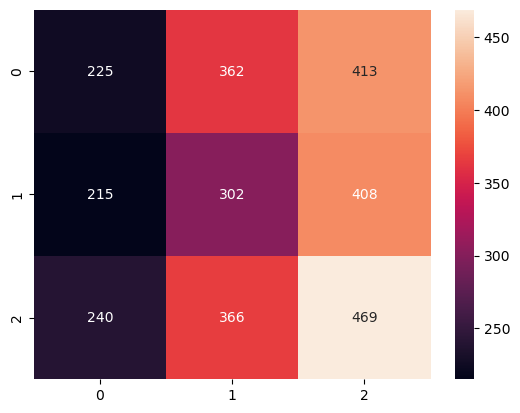

In [14]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [15]:
lr_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",lr_accuracy_score)

Train accuracy =  0.3365714285714286


In [16]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(lr,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.32113721 0.33608301 0.34334749 0.33615917 0.32721882]
Bias error: 0.6672108589883632
Variance error: 0.023294574242689294
